## 워드클라우드 (영문)

- 단어의 등장 빈도를 시각화 한 형태
- `wordcloud` 패키지 설치가 필요하다.

In [ ]:
! pip install wordcloud

### 실습용 파일 다운로드

> https://data.hossam.kr/D04/wordcloud.zip

### #01. 워드클라우드 기본 생성 방법

#### 패키지 참조

In [1]:
# 이미지 출력을 위한 jupyter 전용 기능
from IPython.display import Image, display

# 워드클라우드 클래스
from wordcloud import WordCloud

# 금지어 설정 모듈
from wordcloud import STOPWORDS

# 이미지 처리 모듈 (파이썬 기본 내장)
from PIL import Image as Img

import numpy as np

#### 데이터 가져오기

In [4]:
# wordcloud파일에 있는 이상한나라의앨리스 텍스트 파일을 읽기모드로 불러오기
with open('wordcloud/이상한나라의앨리스.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    print(text)

Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: Alice's Adventures in Wonderland
       Illustrated by Arthur Rackham. With a Proem by Austin Dobson

Author: Lewis Carroll

Illustrator: Arthur Rackham

Release Date: May 19, 2009 [EBook #28885]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***




Produced by Jana Srna, Emmy and the Online Distributed
Proofreading Team at http://www.pgdp.net (This file was
produced from images generously made available by the
University of Florida Digital Collections.)











ALICE'S ADVENTURES IN WONDERLAND

[Illustration: "Alice"]

[Illustration:

          ALICE'S·ADVENTURES
          IN·WONDERLAND
          BY·LEWIS·CAR

#### 워드 클라우드 객체 생성

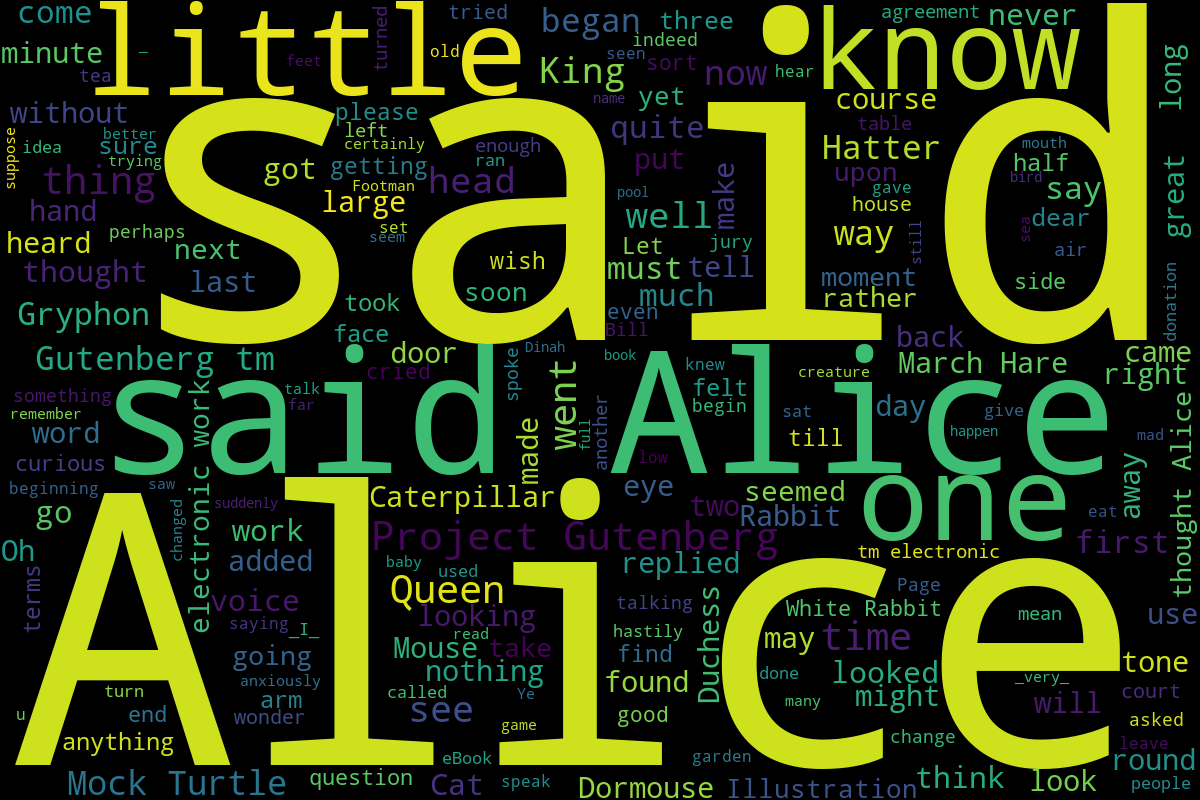

In [7]:
# 워드 클라우드 클래스의 객체 생성 -> 생성될 가로, 세로 크기 지정(px단위)
wc = WordCloud(width=1200, height=800)

# 읽어들인 텍스트 내용을 generate 메서드에 전달
wc.generate(text)

# wc.words_는 산정된 각 단어별 빈도수에 대한 딕셔너리이다.
# print(wc.words_)

# 그래픽 표시 데이터를 단어 빈도수에 대한 딕셔너리로 지정
# simple.png라는 이름으로 to_file 로 저장(딕셔너리 형태)
wc.to_file("simple.png")

# 이미지를 출력하기 위한 jupyter 전용코드
# from IPython.display import Image 모듈 이용
display(Image(filename='simple.png'))

### ------------------------------------------------------------------------

### #02. wordcloud객체의 옵션

#### 금지어 설정

In [8]:
# 금지어 설정 모듈 (STOPWORDS) 

# 금지어를 담은 ignore변수 설정
ignore = set(STOPWORDS)

# 필요한 만큼 add() 함수를 호출하여 추가
ignore.add("said")
ignore.add("Alice")

#### 마스크 이미지 설정

In [10]:
# 파이썬 내장 이미지 모듈(from improt Image as Img)

# wordcloud파일의 앨리스배경.png파일 불러오기
img = Img.open("wordcloud/앨리스배경.png")

# 이미지 통째로 numpy로 바꾼다. (왜..?)
iarr = np.array(img)
iarr
# 설정 후 mask 파라미터로 확인하기

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

#### 워드 클라우드 확인

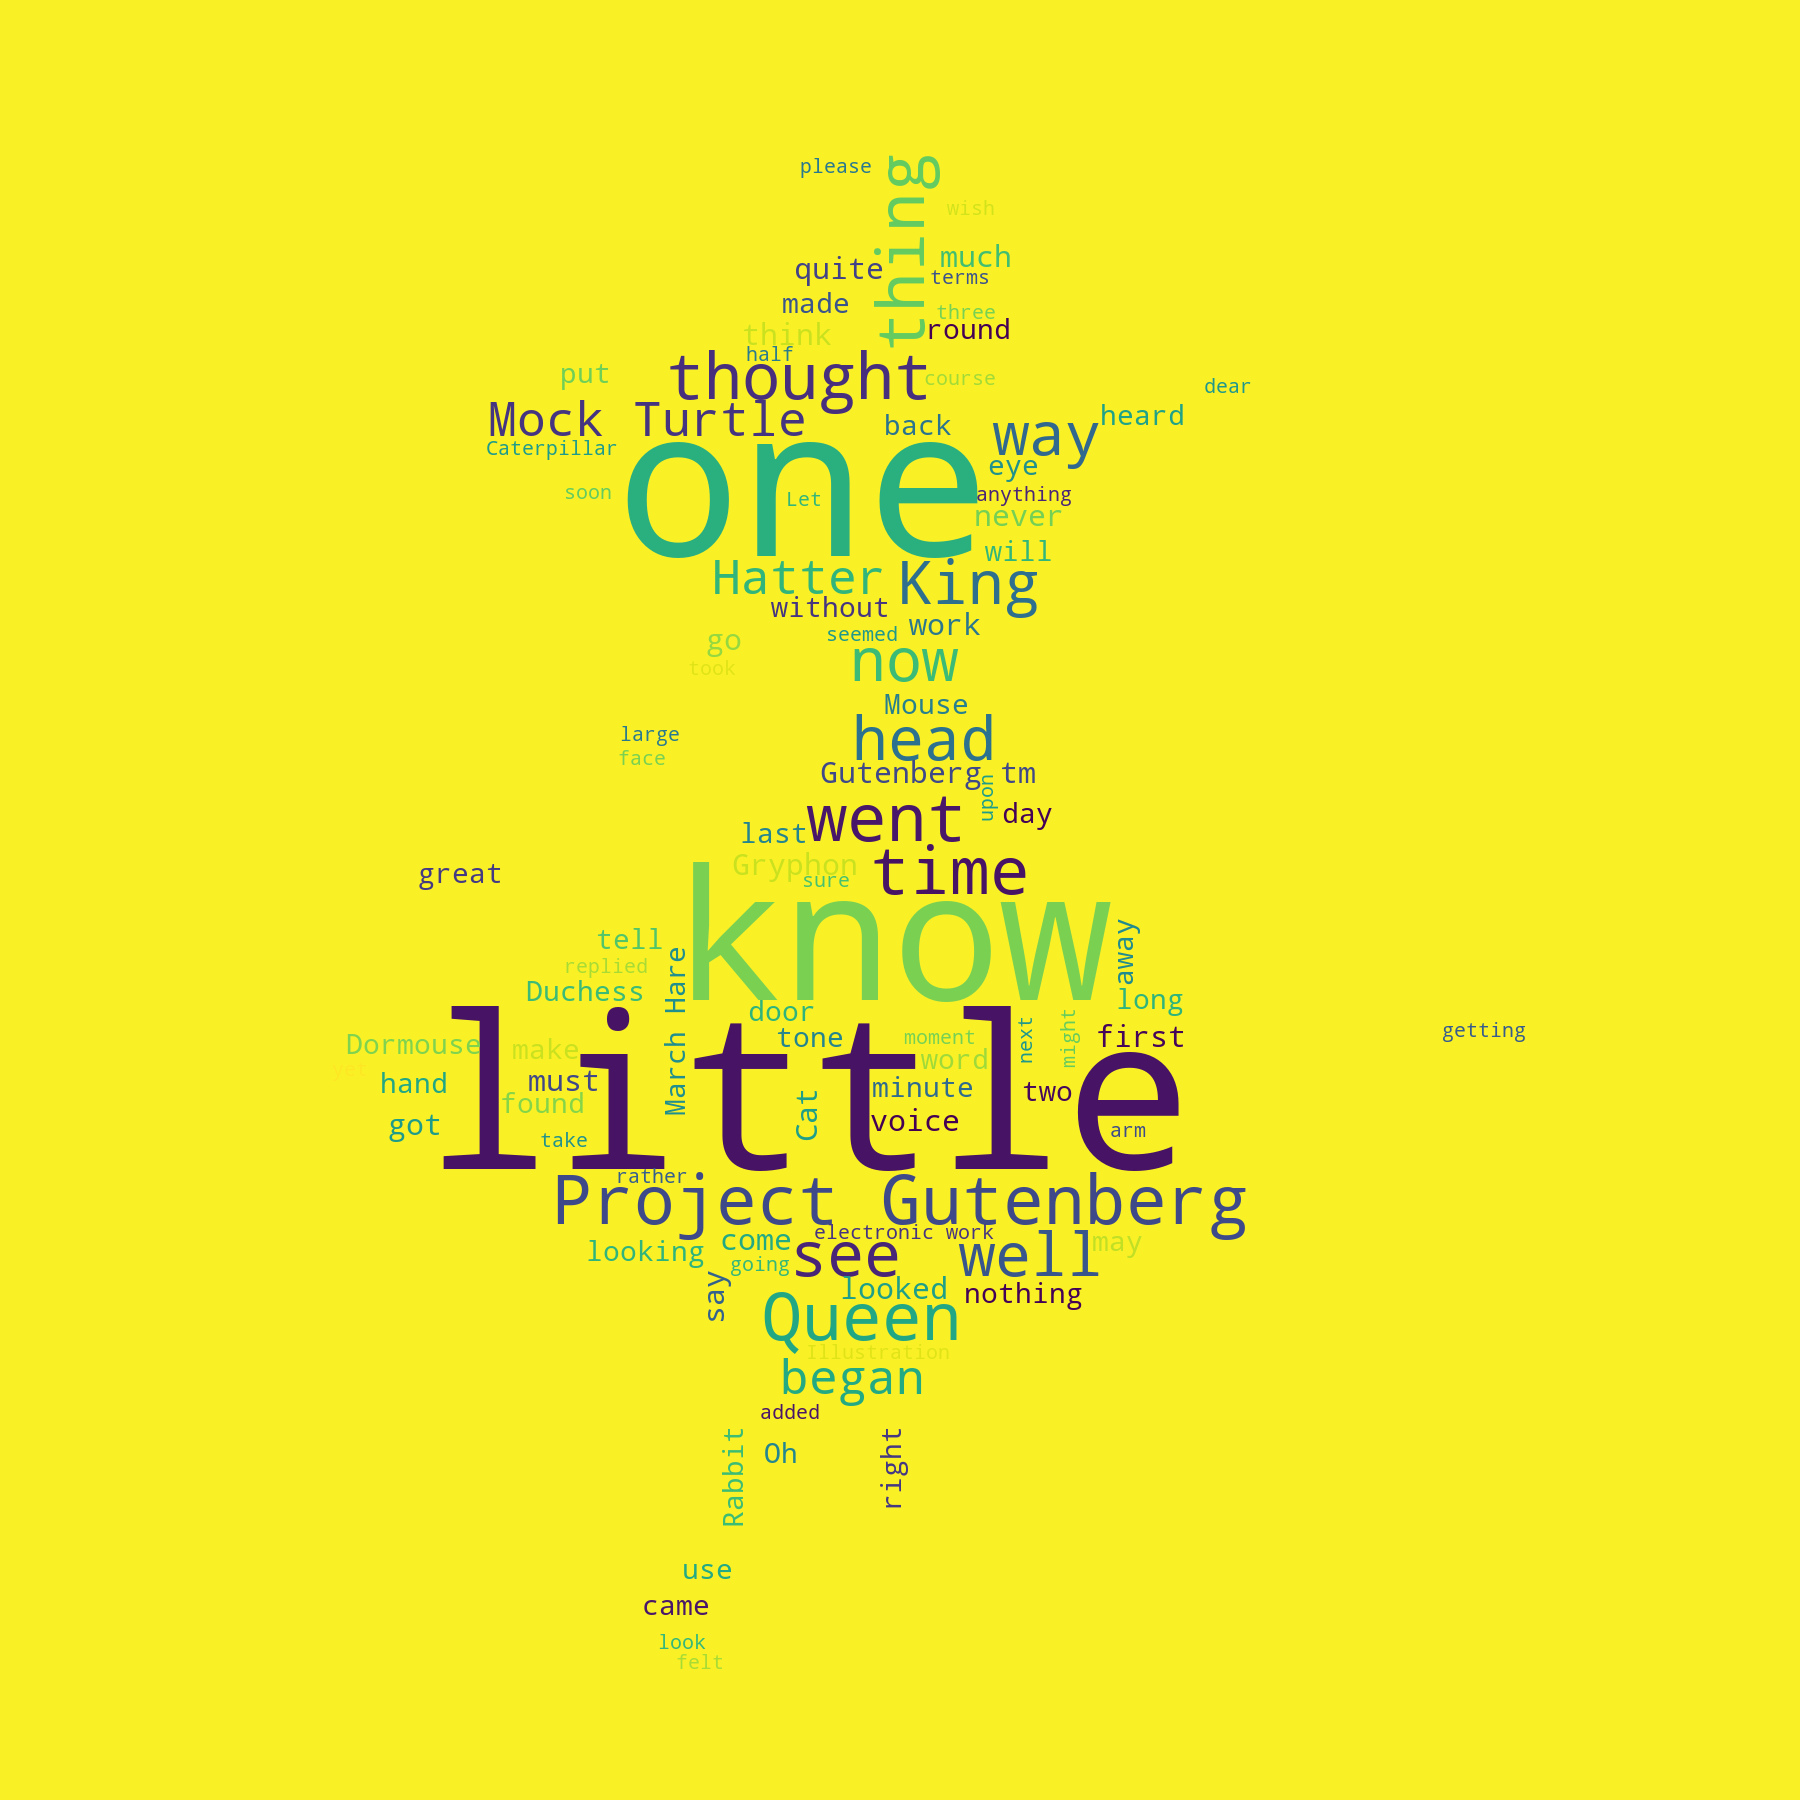

In [15]:
wc = WordCloud(width=600, height=1200, max_font_size=150,
               scale=2.0, max_words=100, stopwords=ignore, mask=iarr,
               background_color= '#faf026')

wc.generate(text)
wc.to_file('options.png')
display(Image(filename='options.png'))

### ---------------------------------------------------------------

### #03. 색상 설정

#### 글자색상을 반환하는 함수

In [21]:
# 함수이름은 상관없지만 파라미터는 사전에 API가 정해놓은 규칙에 따라 정의해야 한다.
# 이 함수는 wordcloud 객체에 의해서 단어수만큼 호출 당하는 함수

# position = x축 y축
# orientation = 각도
# random_state = 랜덤값을 생성할 수 있는 객체 (False/True)
# kwargs = 

def get_color(word, font_size, position, orientation, random_state=None, **kwargs):
    # case1) 단일색상 지정
    # -> color = "#999999"
    # -> color = "rgb(66, 135, 245)"
    # -> color = "hsl(217, 30%, 87%)"

    # case2) 랜덤으로 지정
    # random_state.seed() # 랜덤숫자 카드를 섞는다.
    # r = random_state.randint(0, 255) # red
    # g = random_state.randint(0, 255) # green 
    # b = random_state.randint(0, 255) # blue
    # color ="rgb(%d,%d,%d)" % (r,g,b) # rgb(21, 80, 176) 형식으로 색상문자열 생성
    # return color

    # case3) HSL 색상은 3차원 원통 (51도마다 값이 바뀐다.)
    # 한가지 색상에서의 명도와 채도의 차이로 표현 (0도이면 너무 어둡거나 안보여서 적당히 30을 준 것)
    # - 색상(H) : 0~360, 원형의 색상 띠('빨주노초파남보'는 대략 51도씩 차이)
    # - 채도(S) : 0~100%, 색상의 순도(빨갛다~새빨갛다 등)
    # - 명도(L) : 0(어둠) ~ 100(밝음)
    random_state.seed()
    a = random_state.randint(30,90)
    b = random_state.randint(30,90)
    color = "hsl(270, %d%%, %d%%)" % (a,b) #hsl(270, 54%, 32%) 형식으로 문자열 생성
    return color

#### 워드클라우드 생성

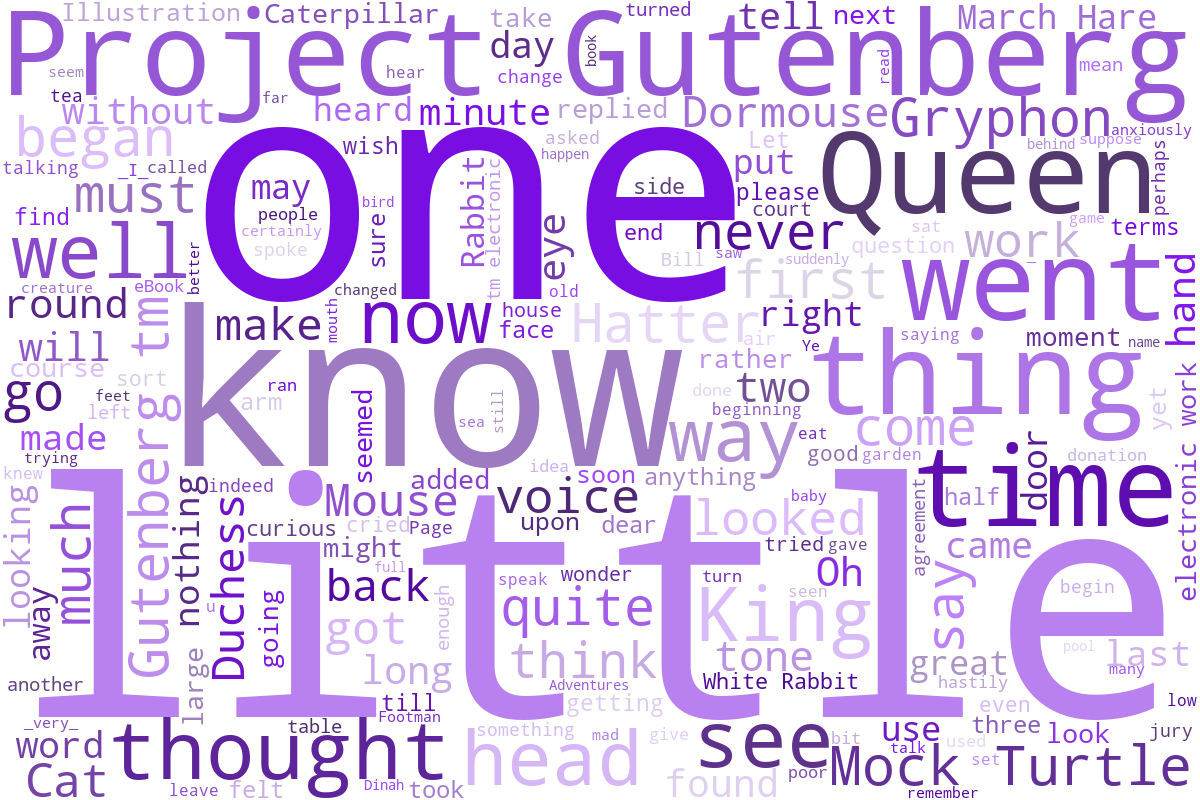

In [22]:
# background_color 파라미터를 통해 배경색상을 설정할 수 있다.
wc = WordCloud(width=1200, height=800, stopwords=ignore, background_color="#ffffff")
wc.generate(text)

# 단어의 색상을 반환할 함수를 연결
# -> 색상값을 리턴해 줄 함수의 이름(color_func)과 random_state 기능 사용여부(random_state=True/False) 설정
#   여기서 설정한 random_state에 따라 get_color 함수 안에서 랜덤값을 사용할 수 있을지가 결정된다.
wc.recolor(color_func=get_color, random_state=True)

wc.to_file("colors.png")
display(Image(filename='colors.png'))